<a href="https://colab.research.google.com/github/rahiakela/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/blob/10-introduction-to-artificial-neural-networks-with-keras/building_linear_regression_using_sequential_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Linear Regression Using the Sequential API

## Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
from tensorflow import keras

## Load database

Let’s switch to the California housing problem and tackle it using a regression neural network. For simplicity, we will use Scikit-Learn’s fetch_california_housing() function to load the data.

After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features:

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load dataset
housing = fetch_california_housing()

# split dataset into traing and test set 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# prepare validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# scale all the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

## Build, train and evaluate the model

Using the Sequential API to build, train, evaluate, and use a regression MLP to make predictions is quite similar to what we did for classification. 

The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error. 

Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [6]:
# create model architecture
model = keras.models.Sequential([
   keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
   keras.layers.Dense(1)                 
])

# compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# evaluate the model
mse_test = model.evaluate(X_test, y_test)

# make prediction
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 94us/sample - loss: 1.9042 - val_loss: 5.2232
Epoch 2/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.8337 - val_loss: 1.7539
Epoch 3/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.6958 - val_loss: 0.8909
Epoch 4/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.6356 - val_loss: 0.6254
Epoch 5/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5965 - val_loss: 0.5564
Epoch 6/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5663 - val_loss: 0.5322
Epoch 7/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5420 - val_loss: 0.5115
Epoch 8/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5219 - val_loss: 0.5046
Epoch 9/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5049 - val_l

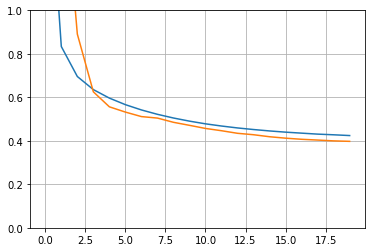

In [8]:
import pandas as pd

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
y_pred

array([[0.63085806],
       [1.569912  ],
       [3.289466  ]], dtype=float32)